In [219]:
import numpy as np
import operator
import matplotlib.pyplot as plt

In [220]:
class GridWorld:
    def __init__(self):
        self.height = 5
        self.width = 5
        self.grid = np.zeros((self.height, self.width)) - 1
        self.current_location = (4, np.random.randint(0, 5))

        self.bomb_location = (1, 3)
        self.gold_location = (0, 3)
        self.terminal_states = [self.bomb_location, self.gold_location]

        self.grid[self.bomb_location[0], self.bomb_location[1]] = -10
        self.grid[self.gold_location[0], self.gold_location[1]] = 10

        self.actions = ["up", "down", "left", "right"]

    
    def get_available_actions(self):
        return self.actions
    
    def agent_on_map(self):
        grid = np.zeros((self.height, self.width))
        grid[self.current_location[0], self.current_location[1]] = 1

        return grid
    
    def get_reward(self, new_location):
        return self.grid[self.current_location[0], self.current_location[1]]
    
    def make_step(self, action):
        previous_location = self.current_location
        if (action == "up"):
            if previous_location[0] == 0:
                reward = self.get_reward(previous_location)
            else:
                self.current_location = (self.current_location[0] - 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
        
        if (action == "down"):
            if previous_location[0] == self.height - 1:
                reward = self.get_reward(previous_location)
            else:
                self.current_location = (self.current_location[0] + 1, self.current_location[1])
                reward = self.get_reward(self.current_location)
        

        if (action == "left"):
            if previous_location[1] == 0:
                reward = self.get_reward(previous_location)
            else:
                self.current_location = (self.current_location[0], self.current_location[1] - 1)
                reward = self.get_reward(self.current_location)
        
        if (action == "right"):
            if previous_location[1] == self.width - 1:
                reward = self.get_reward(previous_location)
            else:
                self.current_location = (self.current_location[0], self.current_location[1] + 1)
                reward = self.get_reward(self.current_location)
        
        return reward

    def check_state(self):
        if (self.current_location in self.terminal_states):
            return 'terminal'

In [221]:
class RandomAgent():
    def choose_action(self, available_actions):
        return np.random.choice(available_actions)

In [222]:
class QAgent():
    def __init__(self, environment, epsilion=0.05, alpha=0.1, gamma = 1):
        self.environment = environment
        self.q_table = dict()
        for x in range(environment.height):
            for y in range(environment.width):
                self.q_table[(x, y)] = {"up": 0, "down": 0, "left": 0, "right": 0}

        self.epsilion = epsilion
        self.alpha = alpha
        self.gamma = gamma
    
    def choose_action(self, available_actions):
        if (np.random.uniform(0, 1) < self.epsilion):
            action = available_actions[np.random.randint(0, len(available_actions))]
        else:
            q_values_of_state = self.q_table[self.environment.current_location]
            maxValue = max(q_values_of_state.values())
            action = np.random.choice([k for k, v in q_values_of_state.items() if v == maxValue])
        
        return action
    
    def learn(self, old_state, reward, new_state, action):
        q_values_in_new_state = self.q_table[new_state]
        max_q_value_in_new_state = max(q_values_in_new_state.values())
        current_q_value = self.q_table[old_state][action]
        
        self.q_table[old_state][action] = (1 - self.alpha) * current_q_value + self.alpha * (reward + self.gamma * max_q_value_in_new_state)
        

In [223]:
def play(environment, agent, trials = 500, max_steps_per_episode=1000, learn=False):
    reward_per_episode = []

    for trial in range(trials):
        cumulative_reward = 0
        step = 0
        game_over = False

        while step < max_steps_per_episode and game_over != True:
            old_state = environment.current_location
            action = agent.choose_action(environment.actions)
            reward = environment.make_step(action)
            new_state = environment.current_location
        
            if (learn == True):
                agent.learn(old_state, reward, new_state, action)
            
            cumulative_reward += reward
            if reward == 10:
                print("Reward: ", reward, cumulative_reward, environment.current_location, environment.terminal_states)
            step += 1
        
            if (environment.check_state() == 'terminal'):
                environment.__init__()
                game_over = True
        
        reward_per_episode.append(cumulative_reward)
    
    return reward_per_episode

In [224]:
env = GridWorld()
random_agent = RandomAgent()

In [225]:
reward_per_episode  = play(env, random_agent)

Reward:  10.0 -78.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -28.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -11.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -14.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -48.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -23.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -20.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -34.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -70.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -13.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -34.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -14.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -62.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -50.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -20.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -4.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -108.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -10.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -53.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 0.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -14.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -54.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -31.0 (0, 3) [(1, 3)

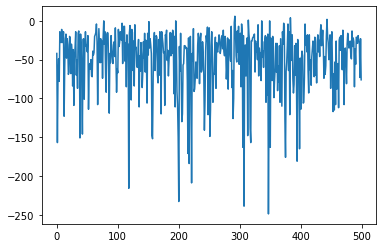

In [227]:
plt.plot(reward_per_episode)

Reward:  10.0 -7.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -5.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -27.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -26.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -1.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -73.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -11.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -17.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 4.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -7.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -15.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 6.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -28.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -4.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -7.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -10.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -1.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -17.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -2.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -1.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -1.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 2.0 (0, 3) [(1, 3), (0, 3)]
Reward:  10.0 -1.0 (0, 3) [(1, 3), (0, 3)]
Rewar

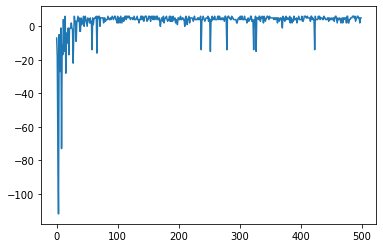

In [228]:
environment = GridWorld()
agentQ = QAgent(environment)

reward_per_episode = play(environment, agentQ, trials=500, learn=True)

plt.plot(reward_per_episode)

In [229]:
def pretty(d, indent=0):
    for key, value in d.items():
        print('\t' * indent + str(key))
        if isinstance(value, dict):
            pretty(value, indent+1)
        else:
            print('\t' * (indent+1) + str(value))


pretty(agentQ.q_table)

(0, 0)
	up
		-0.4000000000000001
	down
		-0.43547100000000005
	left
		-0.39000000000000007
	right
		-0.2196309113982267
(0, 1)
	up
		-0.2
	down
		-0.2
	left
		-0.2
	right
		4.639131767339138
(0, 2)
	up
		4.54044302020184
	down
		4.428154971177371
	left
		0.7494623106636717
	right
		9.999999999999995
(0, 3)
	up
		0
	down
		0
	left
		0
	right
		0
(0, 4)
	up
		1.0475109638100002
	down
		0.029941991000000015
	left
		8.49905364703001
	right
		-0.1
(1, 0)
	up
		-0.6252170690000001
	down
		-0.6883054279816103
	left
		-0.6000000000000001
	right
		-0.5776751000000001
(1, 1)
	up
		-0.3691000000000001
	down
		-0.4449185698800001
	left
		-0.4099900000000001
	right
		4.905093293448148
(1, 2)
	up
		8.999999999999982
	down
		3.173483573339433
	left
		1.122693098822368
	right
		-6.12579511
(1, 3)
	up
		0
	down
		0
	left
		0
	right
		0
(1, 4)
	up
		4.748986384754993
	down
		-0.12
	left
		-1.0
	right
		-0.2
(2, 0)
	up
		-0.9290981359000001
	down
		-0.9075833442500203
	left
		-0.9000000000000004
	right
	